In [268]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os
import nltk
from collections import Counter
import yaml
import re

# Sentiment file load

In [269]:
file_path = '/Users/admin/Desktop/Data_Engineering/W2//WordCloud/training.1600000.processed.noemoticon.csv'

# column name 수정 및 불필요한 column 삭제

In [270]:
# CSV 파일 읽기
df = pd.read_csv(file_path, encoding='latin-1')
df.columns.values[0] = 'sentiment'
df.columns.values[5] = 'text'
df = df[['sentiment', 'text']]
df

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


# Positive sentiment 1000개 sampling

In [271]:
positive_samples = df[df['sentiment'] == 4].sample(n=1000, random_state=random.randint(10, 99))
positive_samples

,sentiment,text
1391039,4,@abhilash at sadvidya ?cool Say whatever u wa...
1218772,4,@JennaMadison Geez I was falling asleep in th...
1276554,4,@danadearmond cool! let us know how it goes
1517921,4,@ work ...tired.. 7 hours left and 10 days u...
1310475,4,@rantingravenlun Hopefully they'll change thei...
...,...,...
1202207,4,@agent2768 @djkatscan I've learned to enjoy li...
1476132,4,@HELL0KiTTYx :'( u're so lucky!!! I'm gonna go...
1010468,4,New Twitter. I'm giving my new followers FREE ...
938111,4,has rekindled her love affair with all things ...


# Negative sentiment 1000개 sampling

In [272]:
negative_samples = df[df['sentiment'] == 0].sample(n=1000, random_state=random.randint(10, 99))
negative_samples

,sentiment,text
299570,0,Not having a lunch is killing me I am STARVING
342292,0,@AlexFayle My objective for the next week is f...
716015,0,elvis has leave the building..
313704,0,wow... h8ing life... feelinglike a train just ...
393037,0,"have no power for work out today ,tomorrow..."
...,...,...
578672,0,@DrJeffersnBoggs Seems the problem(s) are with...
160609,0,Cannot sleep. 2+ hours of tossing and turning.
534278,0,Realtime Twitter searches and trending topics:...
292200,0,@InnocntBystnder i missed the mtv awards


# Dataframe의 text join

In [273]:
positive_texts = ' '.join(positive_samples['text'])
print(positive_texts)
negative_texts = ' '.join(negative_samples['text'])
print(negative_texts)

@abhilash at sadvidya ?cool  Say whatever u want, don't ask them to start tweeting ) @JennaMadison  Geez I was falling asleep in the chair just then.I just walked to the sink to wash dishes 1/2 hour ago.  lol  @danadearmond cool! let us know how it goes  @ work ...tired..  7 hours left  and 10 days untill TF2  @rantingravenlun Hopefully they'll change their minds and support us, and their own community and give us our money..  @kalena but did you see my boys? The highlight of the show don't y'know!  @matthew_raymer Trying to figure out what your &quot;huh?&quot; was in reference to...  Just made a new account...  I don't want to go to school !! WAAAAAAAAAAAH !  @AnoopDoggDesai come put up a singing show in Singapore, we'll love it!!!!  @tweetcomedyclub oh and now you've got @stephenfry. That's the holy grail right there.  @creativeswag awl  that sounds nice This is the good life...A long w/end, a new PC, the most amazing woman in the world to spend the w/end with... Its gona be a good 

# WordCloud 생성

In [274]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='magma', max_words=200).generate(positive_texts)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='magma', max_words=200).generate(negative_texts)

# 1000개 Samling Positive, Negative WordCloud Plot

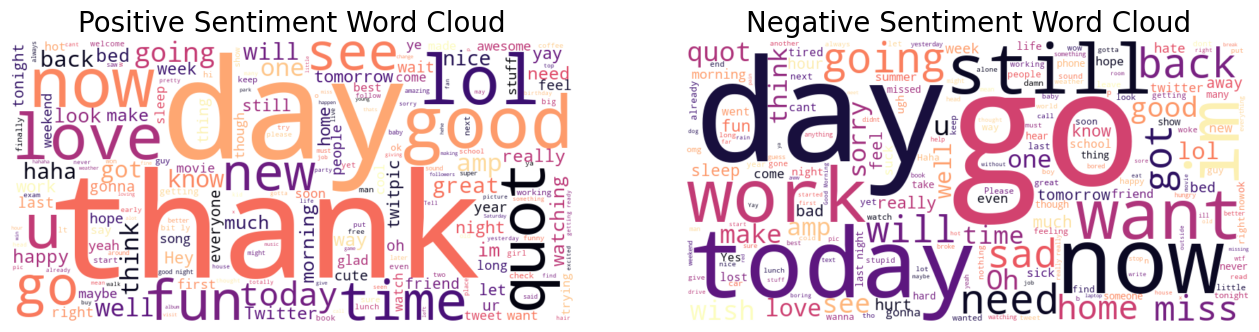

In [275]:
# 플롯 그리기
plt.figure(figsize=(16, 8))

# 긍정적 워드 클라우드
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=20)

# 부정적 워드 클라우드
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=20)

plt.show()


In [276]:
# 제외할 words set 생성
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [277]:
# stopwords 내의 word를 제외
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


# nltk를 이용한 불필요한 word 제외

In [278]:
df['Filtered_text'] = df['text'].apply(remove_stopwords)
df

,sentiment,text,Filtered_text
0,0,is upset that he can't update his Facebook by ...,upset ca n't update Facebook texting ... might...
1,0,@Kenichan I dived many times for the ball. Man...,@ Kenichan dived many times ball . Managed sav...
2,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....","@ nationwideclass , 's behaving . 'm mad . ? c..."
4,0,@Kwesidei not the whole crew,@ Kwesidei whole crew
...,...,...,...
1599994,4,Just woke up. Having no school is the best fee...,woke . school best feeling ever
1599995,4,TheWDB.com - Very cool to hear old Walt interv...,TheWDB.com - cool hear old Walt interviews ! â...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...,ready MoJo Makeover ? Ask details
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday boo alll time ! ! ! Tupac ...


## 특수문자, 기호, 숫자 등 제외

In [279]:
def filter_words(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

#    ','  '.'  특수문자와 같은 기호 제외

In [280]:
df['Filtered_text'] = df['Filtered_text'].apply(filter_words)
df

,sentiment,text,Filtered_text
0,0,is upset that he can't update his Facebook by ...,upset ca nt update Facebook texting might cry...
1,0,@Kenichan I dived many times for the ball. Man...,Kenichan dived many times ball Managed save ...
2,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",nationwideclass s behaving m mad ca nt see
4,0,@Kwesidei not the whole crew,Kwesidei whole crew
...,...,...,...
1599994,4,Just woke up. Having no school is the best fee...,woke school best feeling ever
1599995,4,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom cool hear old Walt interviews ht...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...,ready MoJo Makeover Ask details
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...,Happy th Birthday boo alll time Tupac Amaru...


### 너무 많아서가 이유인지 join이 안 된다. 각 Sentiment 당 50000개 씩 뽑아서 word cloud를 만들어야겠다.

In [281]:
positive_samples = df[df['sentiment'] == 4].sample(n=50000, random_state=random.randint(10, 99))
positive_samples

,sentiment,text,Filtered_text
889802,4,@Fearnecotton shake it is my ringtone that ma...,Fearnecotton shake ringtone makes
898205,4,"@loic Young and old, Yello fits all ages... ne...",loic Young old Yello fits ages new album h...
1486550,4,@xThislove i live in london.,xThislove live london
1387160,4,"@molesworth_1 you're not being a misogynist, a...",molesworth re misogynist ll set CarolineFl...
1501869,4,Tomorrow morning will be AWESOME! ...hopefully...,Tomorrow morning AWESOME hopefully Pray kee...
...,...,...,...
1005052,4,i absolutely love jess' pm. for soemoe who dsn...,absolutely love jess pm soemoe dsnt like ss ...
1120118,4,Time to enjoy every moment,Time enjoy every moment
1259879,4,@bry_wong A topless Lautner is always good,brywong topless Lautner always good
945389,4,@italylogue I am hoping for 75 and nice breez...,italylogue hoping nice breezes aaaahhhhh


In [282]:
negative_samples = df[df['sentiment'] == 0].sample(n=50000, random_state=random.randint(10, 99))
negative_samples

,sentiment,text,Filtered_text
109237,0,call out the instigators because there's somet...,call instigators s something air Rain stopped...
702847,0,@daniela_alexand think i lost hope yrs ago,danielaalexand think lost hope yrs ago
422639,0,"well , hello from Topeka , KS ... nothing to r...",well hello Topeka KS nothing report wuz bea...
156138,0,@HaTheQueen1 noooo i cnt,HaTheQueen noooo cnt
799736,0,@kurly I totally forgot and missed it,kurly totally forgot missed
...,...,...,...
140790,0,@SACLMP nothing u failed me lastnight,SACLMP nothing u failed lastnight
182865,0,@x_greenmints don't leave me,xgreenmints nt leave
535207,0,"@nikkeexox haha my videos wont load, youtube ...",nikkeexox haha videos wont load youtube does...
375768,0,@DavidArchie I hope the right side of your lef...,DavidArchie hope right side left eye nt going...


In [283]:
positive_texts = ' '.join(positive_samples['Filtered_text'])
# print(positive_texts)
negative_texts = ' '.join(negative_samples['Filtered_text'])
# print(negative_texts)

In [284]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='magma', max_words=200).generate(positive_texts)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='magma', max_words=200).generate(negative_texts)

# WordCloud Plot

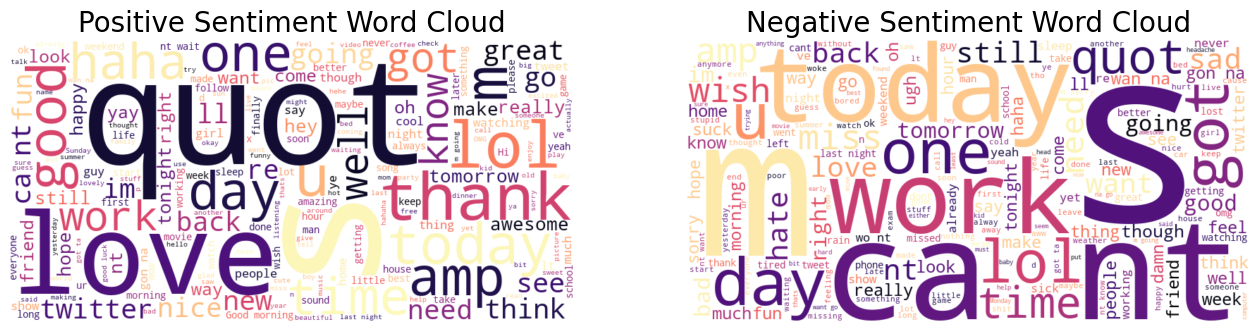

In [285]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=20)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=20)

plt.show()


### nltk로 filtering을 하고 WordCloud를 그리니까 Be동사 I, you, a, the 와 같은 단어가 없어진 것을 알 수 있다.

</br>

# Word 빈도 그래프

## Positive word 상위 20개 단어 빈도 list

In [286]:
positive_words = word_tokenize(positive_texts)
len(positive_words)

395784

In [287]:
positive_word_counts = Counter(positive_words)
positive_top20 = positive_word_counts.most_common(20)
positive_top20

[('s', 5881),
 ('m', 3583),
 ('nt', 3433),
 ('good', 3020),
 ('http', 2946),
 ('quot', 2904),
 ('day', 2698),
 ('love', 2467),
 ('like', 2273),
 ('get', 2019),
 ('u', 1756),
 ('today', 1721),
 ('time', 1699),
 ('got', 1687),
 ('amp', 1662),
 ('know', 1653),
 ('going', 1572),
 ('go', 1564),
 ('ll', 1534),
 ('one', 1518)]

## Negative word 상위 20개 단어 list

In [288]:
negative_words = word_tokenize(negative_texts)
negative_word_counts = Counter(negative_words)
negative_top20 = negative_word_counts.most_common(20)
negative_top20

[('nt', 7587),
 ('s', 5626),
 ('m', 4741),
 ('get', 2837),
 ('go', 2777),
 ('work', 2761),
 ('like', 2505),
 ('day', 2351),
 ('today', 2146),
 ('got', 2109),
 ('going', 1898),
 ('back', 1863),
 ('want', 1820),
 ('miss', 1804),
 ('ca', 1770),
 ('really', 1760),
 ('time', 1636),
 ('sad', 1630),
 ('http', 1590),
 ('na', 1578)]

## 빈도수 상위 20개 단어 Plot

In [289]:
def plot_top_words(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title(title, fontsize=20)
    plt.xlabel('Words', fontsize=15)
    plt.ylabel('Counts', fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

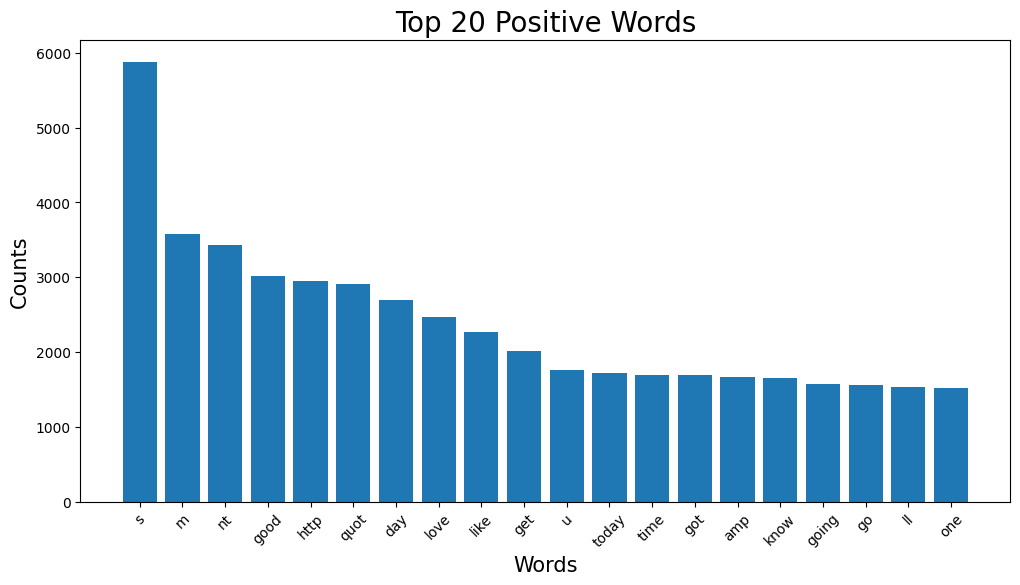

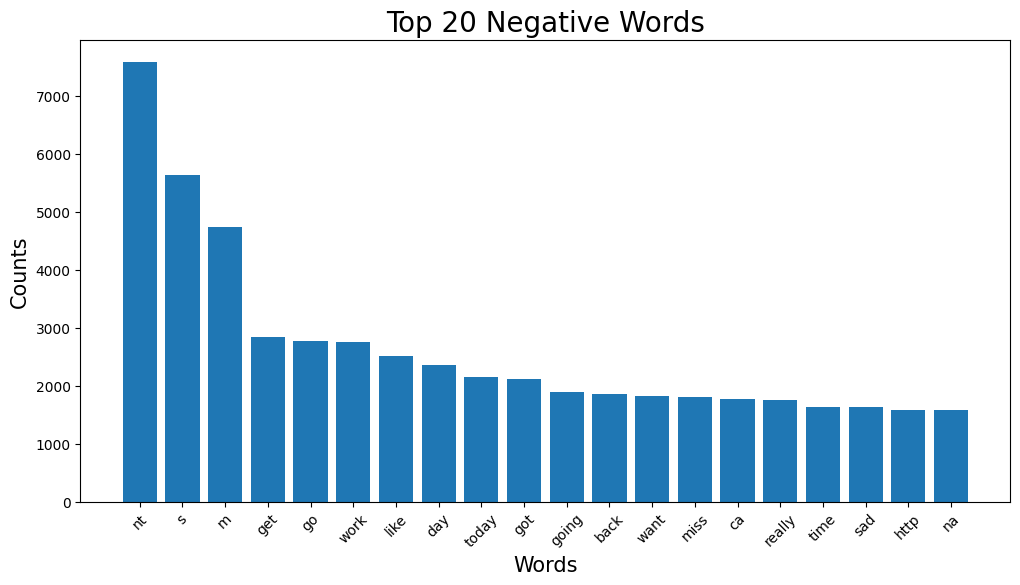

In [290]:
plot_top_words(positive_top20, 'Top 20 Positive Words')

plot_top_words(negative_top20, 'Top 20 Negative Words')

## WordCloud에서는 크게 못느꼈는데 중복되는 word가 많은 것같다. 중복을 제외하고 Plot해봐야겠다.

## positive_words, negative_words 에 둘 다 들어가는 word 제거

In [291]:
positive_words = word_tokenize(positive_texts)
negative_words = word_tokenize(negative_texts)

In [292]:
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

positive_top500 = set([word for word, count in positive_word_counts.most_common(500)])
negative_top500 = set([word for word, count in negative_word_counts.most_common(500)])

In [293]:
len(negative_top500)

500

In [294]:
common_words = set(positive_top500).intersection(set(negative_top500))
positive_words = [word for word in positive_words if word not in common_words]
negative_words = [word for word in negative_words if word not in common_words]

In [295]:
positive_words

['Fearnecotton',
 'shake',
 'ringtone',
 'loic',
 'Young',
 'Yello',
 'fits',
 'ages',
 'album',
 'hopefully',
 'xThislove',
 'london',
 'molesworth',
 'misogynist',
 'set',
 'CarolineFlint',
 'Tomorrow',
 'AWESOME',
 'hopefully',
 'Pray',
 'sanity',
 'Goodnight',
 'correctly',
 'unfollow',
 'listening',
 'Jessica',
 'elliotminor',
 'soooo',
 'feels',
 'Hooray',
 'bath',
 'seriously',
 'favorite',
 'besides',
 'cartoons',
 'DianaEnnen',
 'FF',
 'HELLKiTTYx',
 'lucky',
 'Anddd',
 'ddlovato',
 'album',
 'garyho',
 'forget',
 'pick',
 'books',
 'lent',
 'Social',
 'Data',
 'Revolution',
 'ustreamPjv',
 'lame',
 'Nebraska',
 'nothingness',
 'Finals',
 'exciting',
 'Apparently',
 'Lisa',
 'thinks',
 'Edward',
 'Twilight',
 'disco',
 'ball',
 'light',
 'Lisa',
 'Gta',
 'frm',
 'ufc',
 'wil',
 'bck',
 'online',
 'mins',
 'bigger',
 'bumhat',
 'rubbish',
 'degrees',
 'shopping',
 'expedition',
 'woop',
 'woop',
 'Sitting',
 'pear',
 'drink',
 'yfrogcomkywj',
 'NOLA',
 'together',
 'Loving',
 '

In [296]:
len(common_words)

371

In [297]:
positive_texts = ' '.join(positive_words)
negative_texts = ' '.join(negative_words)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(positive_texts)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(negative_texts)

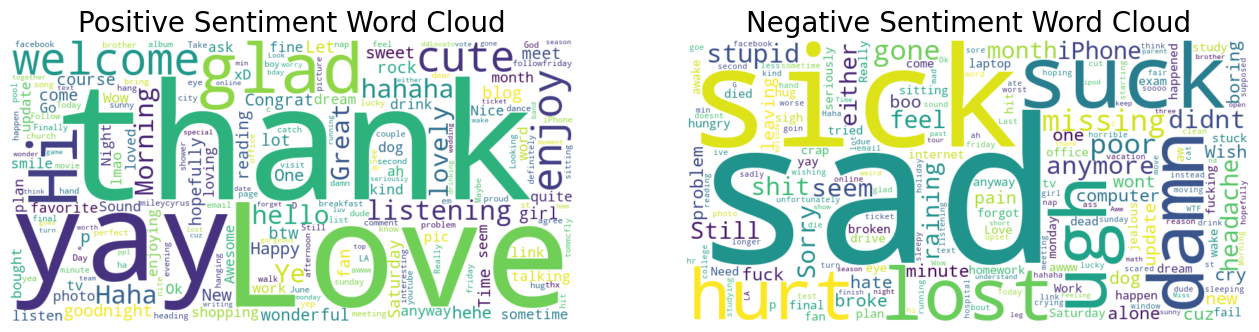

In [298]:
plt.figure(figsize=(16, 8))

# 긍정적 워드 클라우드
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=20)

# 부정적 워드 클라우드
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=20)

plt.show()

In [299]:
positive_word_counts = Counter(positive_words)
positive_top20 = positive_word_counts.most_common(20)
positive_top20

[('thank', 552),
 ('Thank', 426),
 ('Happy', 389),
 ('glad', 380),
 ('cute', 345),
 ('Love', 329),
 ('yay', 327),
 ('welcome', 292),
 ('Morning', 286),
 ('sweet', 266),
 ('Haha', 264),
 ('lovely', 256),
 ('listening', 242),
 ('Hi', 241),
 ('Yes', 238),
 ('Great', 225),
 ('New', 224),
 ('hi', 223),
 ('enjoy', 218),
 ('blog', 216)]

In [300]:
negative_word_counts = Counter(negative_words)
negative_top20 = negative_word_counts.most_common(20)
negative_top20

[('sad', 1630),
 ('sick', 866),
 ('sucks', 573),
 ('lost', 530),
 ('hurts', 437),
 ('gone', 392),
 ('missing', 388),
 ('damn', 340),
 ('anymore', 338),
 ('didnt', 319),
 ('poor', 314),
 ('Sorry', 300),
 ('hurt', 295),
 ('ugh', 295),
 ('headache', 282),
 ('shit', 278),
 ('stupid', 266),
 ('either', 253),
 ('Still', 249),
 ('raining', 242)]

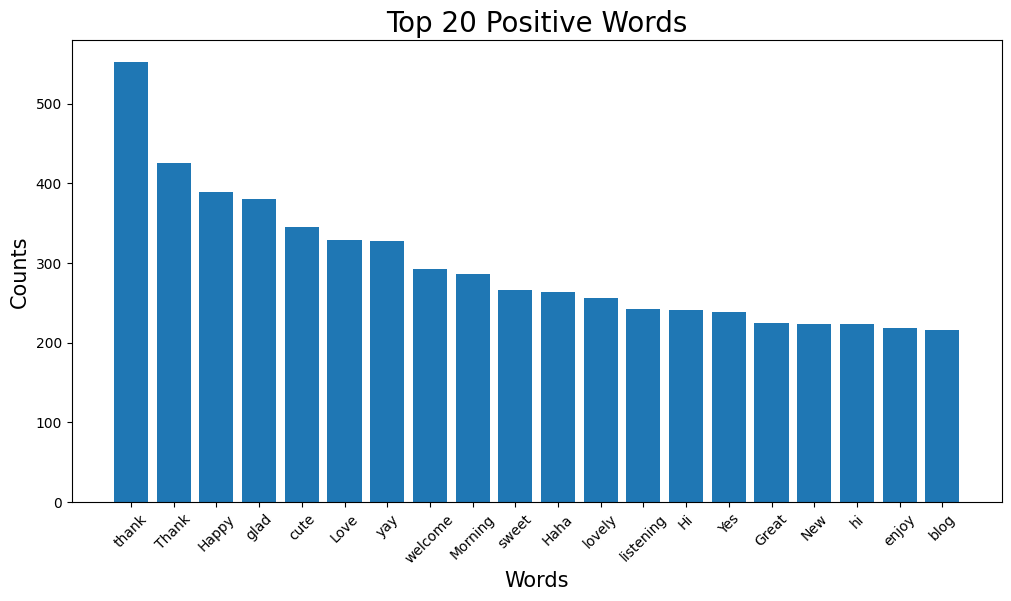

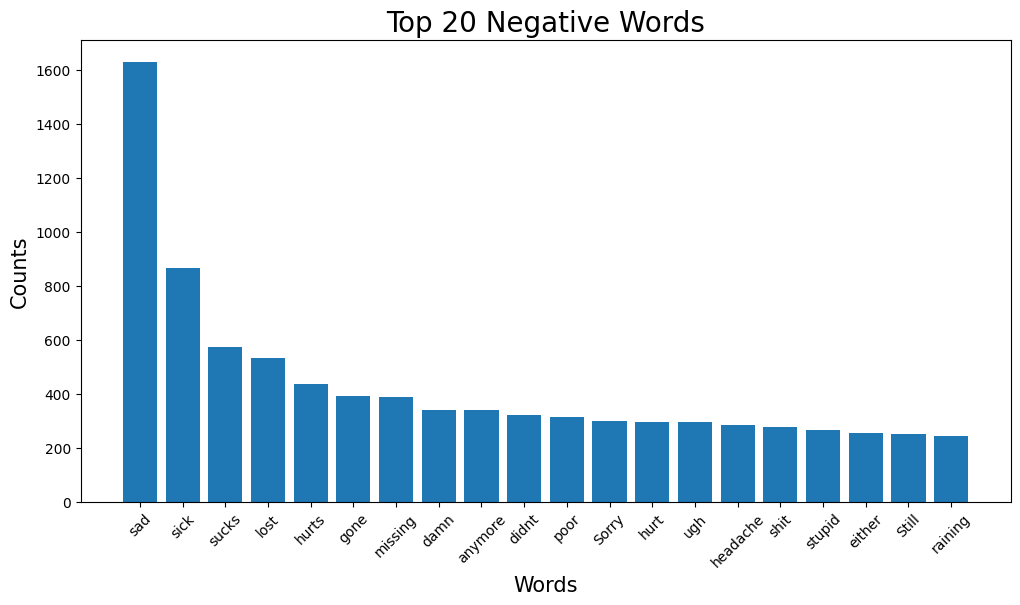

In [301]:
plot_top_words(positive_top20, 'Top 20 Positive Words')
plot_top_words(negative_top20, 'Top 20 Negative Words')

## 정제과정을 거치니 확실히 구분되는 Plot을 구할 수 있었다.